## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Data

In [2]:
df = pd.read_excel('space_launches_advanced_report.xlsx')

df['Country'] = df['Launch Pad'].apply(lambda x: x.split(',')[-1].strip() if ',' in x else 'Unknown')

df.head()

,Name,Date (Central Time),Status,Provider,Rocket,Mission,Launch Pad,Country
0,Sputnik 8K74PS | Sputnik 1,1957-10-04 09:28 AM,Launch Successful,Soviet Space Program,Sputnik 8K74PS,Sputnik 1,"1/5 | Baikonur Cosmodrome, Republic of Kazakhstan",Republic of Kazakhstan
1,Sputnik 8K74PS | Sputnik 2,1957-11-02 02:30 PM,Launch Successful,Soviet Space Program,Sputnik 8K74PS,Sputnik 2,"1/5 | Baikonur Cosmodrome, Republic of Kazakhstan",Republic of Kazakhstan
2,Vanguard | Vanguard,1957-12-06 04:44 AM,Launch Failure,US Navy,Vanguard,Vanguard,"Launch Complex 18A | Cape Canaveral, FL, USA",USA
3,Juno-I | Explorer 1,1958-01-31 03:47 PM,Launch Successful,Army Ballistic Missile Agency,Juno-I,Explorer 1,"Launch Complex 26A | Cape Canaveral, FL, USA",USA
4,Vanguard | Vanguard,1958-02-04 07:33 PM,Launch Failure,US Navy,Vanguard,Vanguard,"Launch Complex 18A | Cape Canaveral, FL, USA",USA


In [4]:
df_past = df[(df['Status'] != 'Go for Launch') & (df['Status'] != 'To Be Confirmed') & (df['Status'] != 'To Be Determined')] 

df_future = df[(df['Status'] != 'Launch Successful') & (df['Status'] != 'Launch Failure') & (df['Status'] != 'Launch was a Partial Failure')] 

## Exploration

### Who has launched the most rockets in the past?

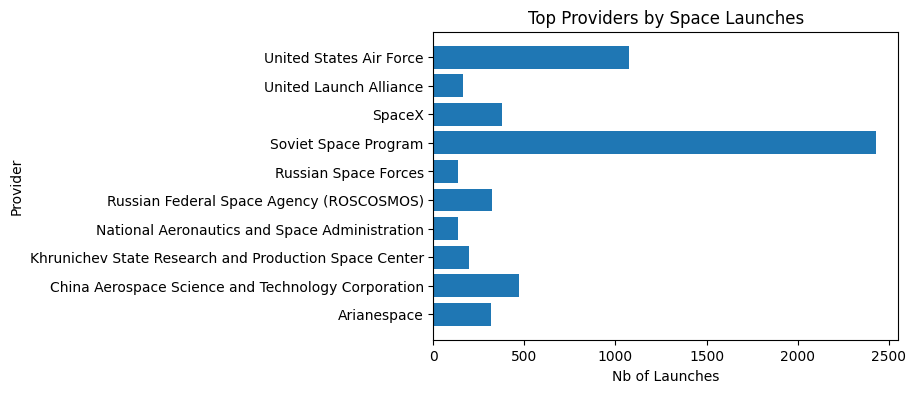

In [4]:
nb_missions = df_past.groupby(by='Provider')['Name'].count().reset_index(name='nb_missions')
nb_missions1 = nb_missions[nb_missions['nb_missions'] > 100]

plt.figure(figsize=(6, 4))
plt.barh(nb_missions1['Provider'], nb_missions1['nb_missions'])
plt.xlabel('Nb of Launches')
plt.ylabel('Provider')
plt.title("Top Providers by Space Launches")
plt.show()


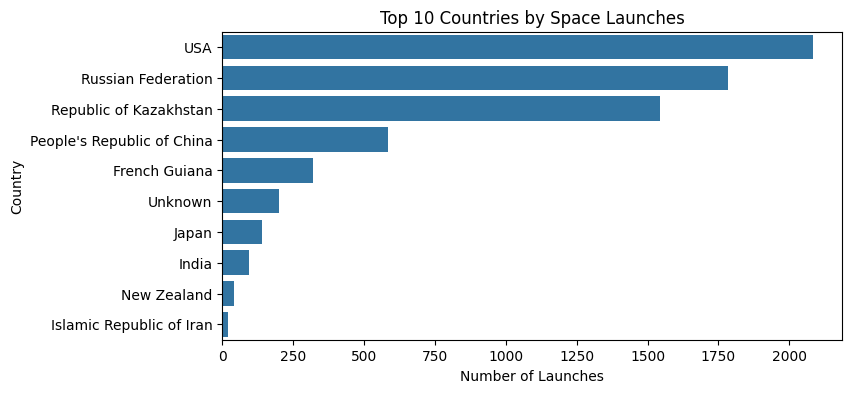

In [5]:
top_countries = df_past['Country'].value_counts().head(10)

plt.figure(figsize=(8, 4))
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.xlabel("Number of Launches")
plt.ylabel("Country")
plt.title("Top 10 Countries by Space Launches")
plt.show()

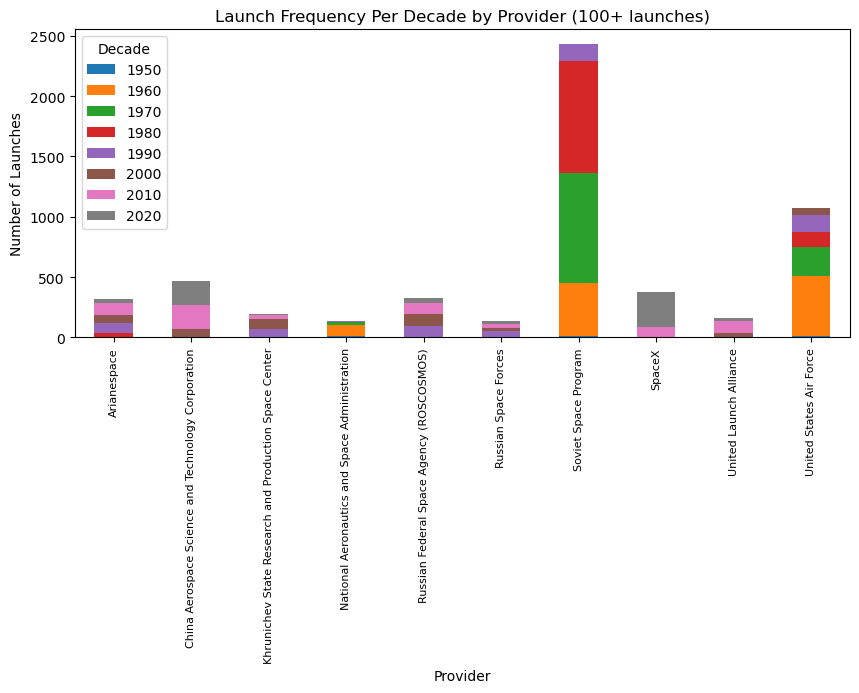

In [6]:
df_past = df_past.copy()

df_past.loc[:, 'Date'] = pd.to_datetime(df_past['Date (Central Time)'])
df_past['Month'] = df_past['Date'].dt.month
df_past.loc[:, 'Year'] = df_past['Date'].dt.year
df_past.loc[:, 'Decade'] = (df_past['Year'] // 10) * 10


launches_per_decade = df_past.groupby(['Provider', 'Decade']).size().unstack(fill_value=0)
launches_per_provider = df_past.groupby('Provider').size()
valid_providers = launches_per_provider[launches_per_provider >= 100].index

launches_per_decade_filtered = launches_per_decade.loc[valid_providers]

launches_per_decade_filtered.plot(kind='bar', stacked=True, figsize=(10, 4))
plt.xlabel("Provider")
plt.ylabel("Number of Launches")
plt.title("Launch Frequency Per Decade by Provider (100+ launches)")
plt.xticks(rotation=90, size = 8)
plt.show()

### Which years were the most active?

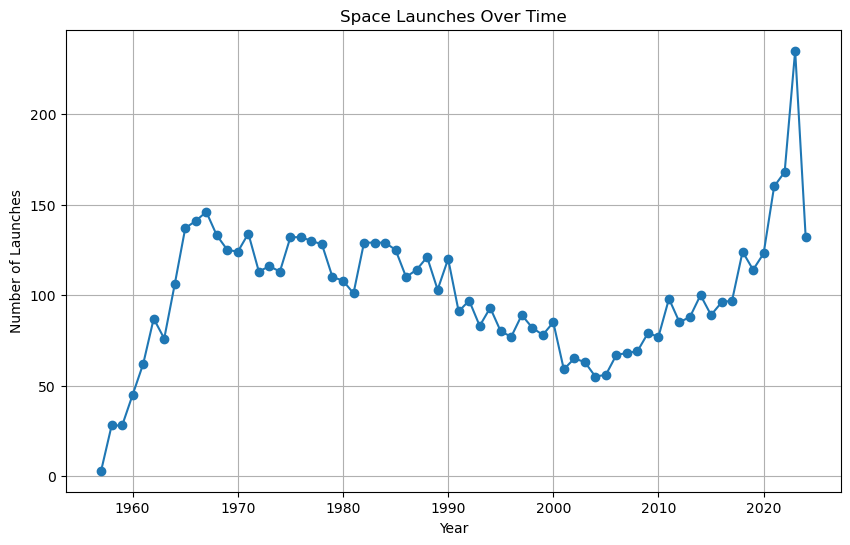

In [7]:
launches_per_year = df_past.groupby('Year').size()

plt.figure(figsize=(10, 6))
plt.plot(launches_per_year.index, launches_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Space Launches Over Time')
plt.grid(True)
plt.show()


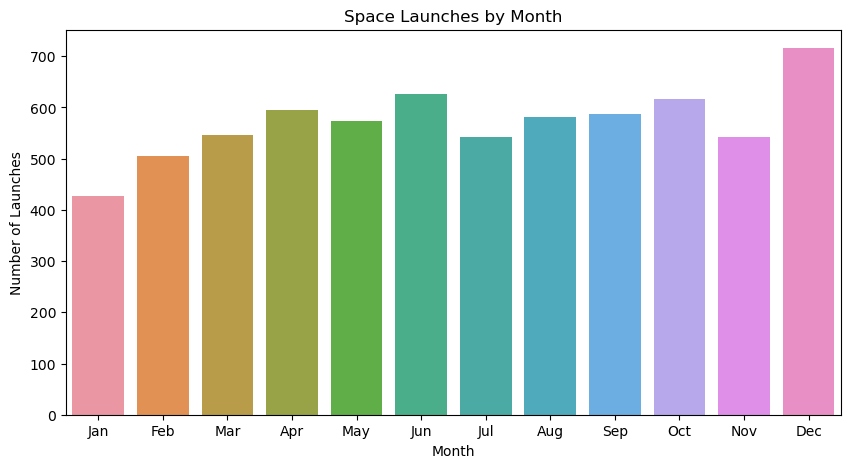

In [8]:
launches_per_month = df_past.groupby('Month').size()

plt.figure(figsize=(10, 5))
sns.barplot(x=launches_per_month.index, y=launches_per_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.title('Space Launches by Month')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


### Which rockets were the most used?

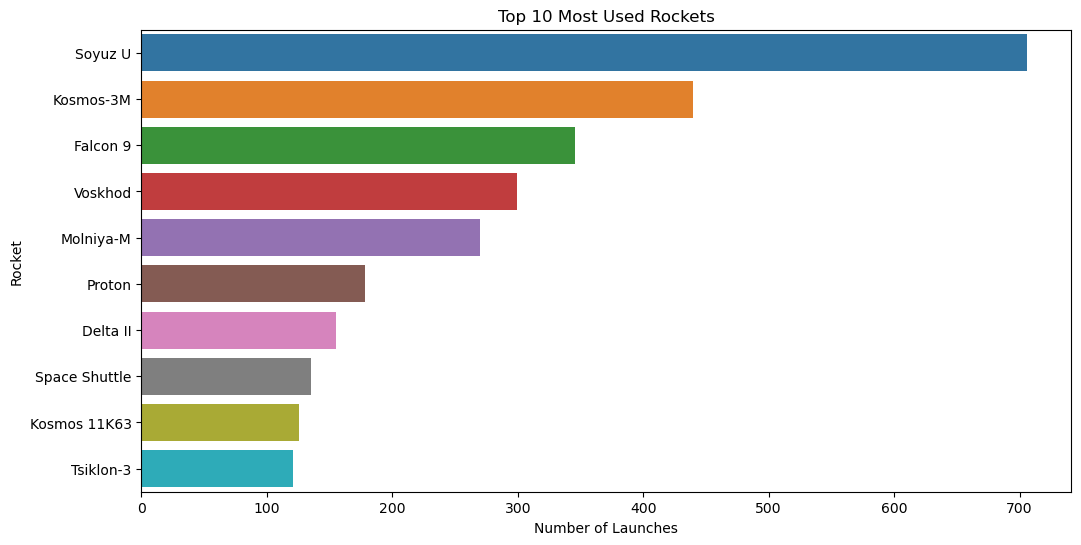

In [9]:
top_rockets = df_past['Rocket'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_rockets.index, x=top_rockets.values)
plt.xlabel("Number of Launches")
plt.ylabel("Rocket")
plt.title("Top 10 Most Used Rockets")
plt.show()


### Which launches are successful?

<Figure size 1200x600 with 0 Axes>

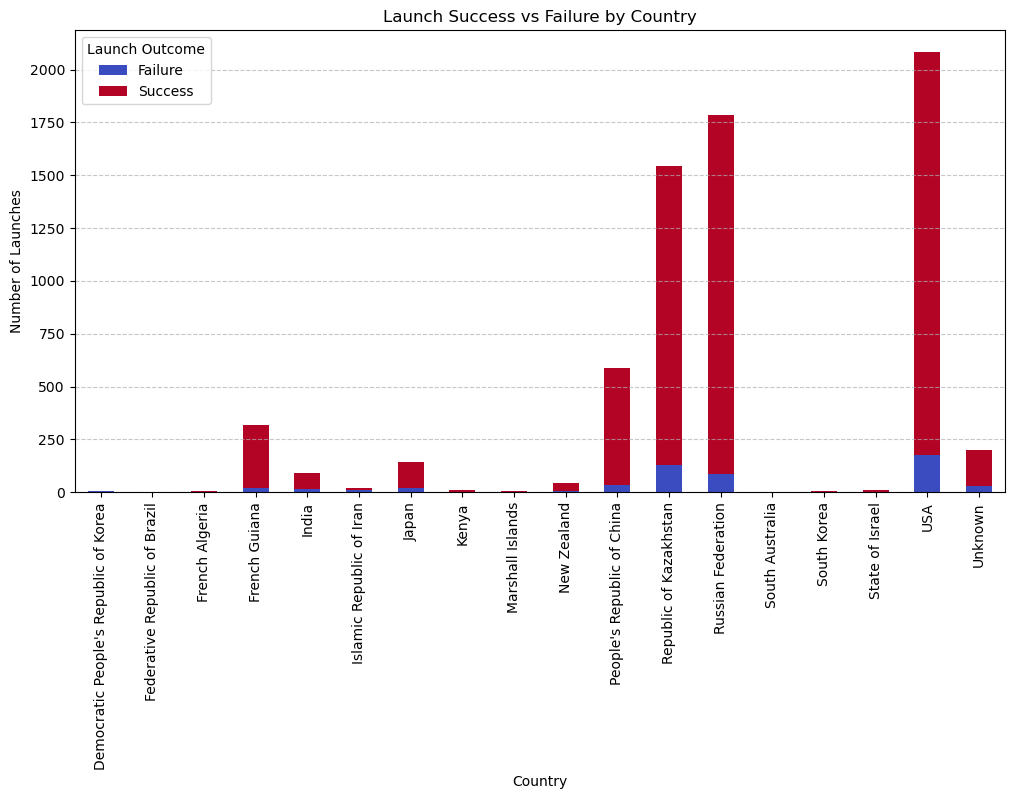

In [10]:
df_past = df_past.copy()

df_past['Launch Outcome'] = df_past['Status'].apply(lambda x: 'Success' if 'Successful' in x else 'Failure')

country_success = df_past.groupby(['Country', 'Launch Outcome']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))

country_success.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')

plt.xlabel("Country")
plt.ylabel("Number of Launches")
plt.title("Launch Success vs Failure by Country")
plt.xticks(rotation=90)
plt.legend(title="Launch Outcome")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Data Story
choose your time window
Here cut the data up into time windows -> big eras 
-> info on who is the most prominent players during that time window

choose your provider 
Here we list the top providers of that era from which you can choose one
-> info on the providers, achievements, … a viz 

choose your rocket
-> info in the rocket itself, thrust, stats, … a viz 


In [5]:
df_past.head()

,Name,Date (Central Time),Status,Provider,Rocket,Mission,Launch Pad,Country
0,Sputnik 8K74PS | Sputnik 1,1957-10-04 09:28 AM,Launch Successful,Soviet Space Program,Sputnik 8K74PS,Sputnik 1,"1/5 | Baikonur Cosmodrome, Republic of Kazakhstan",Republic of Kazakhstan
1,Sputnik 8K74PS | Sputnik 2,1957-11-02 02:30 PM,Launch Successful,Soviet Space Program,Sputnik 8K74PS,Sputnik 2,"1/5 | Baikonur Cosmodrome, Republic of Kazakhstan",Republic of Kazakhstan
2,Vanguard | Vanguard,1957-12-06 04:44 AM,Launch Failure,US Navy,Vanguard,Vanguard,"Launch Complex 18A | Cape Canaveral, FL, USA",USA
3,Juno-I | Explorer 1,1958-01-31 03:47 PM,Launch Successful,Army Ballistic Missile Agency,Juno-I,Explorer 1,"Launch Complex 26A | Cape Canaveral, FL, USA",USA
4,Vanguard | Vanguard,1958-02-04 07:33 PM,Launch Failure,US Navy,Vanguard,Vanguard,"Launch Complex 18A | Cape Canaveral, FL, USA",USA


In [6]:
df['Date (Central Time)'] = pd.to_datetime(df['Date (Central Time)'], format='%Y-%m-%d %I:%M %p')

# Split into 4 dataframes based on the year
df_1957_1970 = df[(df['Date (Central Time)'].dt.year >= 1957) & (df['Date (Central Time)'].dt.year < 1970)]
df_1970_1990 = df[(df['Date (Central Time)'].dt.year >= 1970) & (df['Date (Central Time)'].dt.year < 1990)]
df_1990_2010 = df[(df['Date (Central Time)'].dt.year >= 1990) & (df['Date (Central Time)'].dt.year < 2010)]
df_2010_present = df[df['Date (Central Time)'].dt.year >= 2010]

C:\Users\adrcleme\AppData\Local\Temp\ipykernel_23040\2282718032.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_providers, x='Provider', y='Launch Count', palette='viridis')


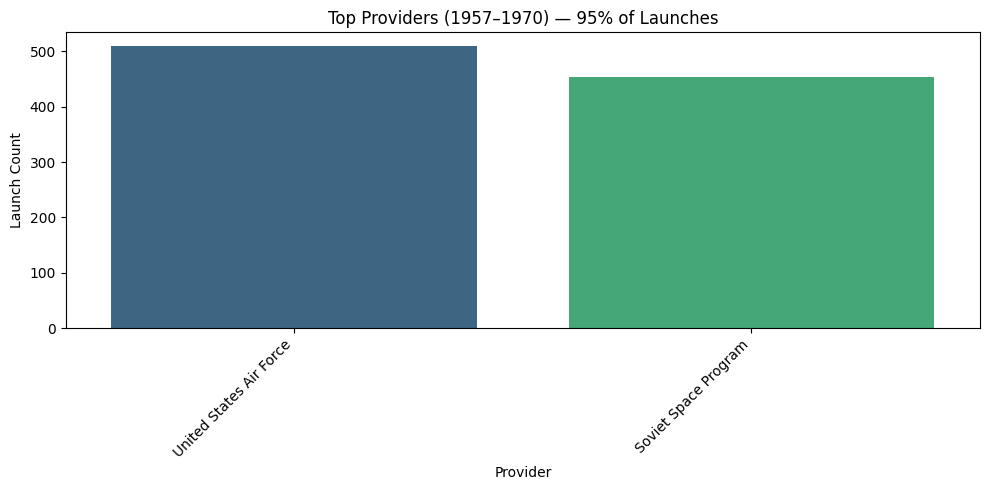

C:\Users\adrcleme\AppData\Local\Temp\ipykernel_23040\2282718032.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_providers, x='Provider', y='Launch Count', palette='viridis')


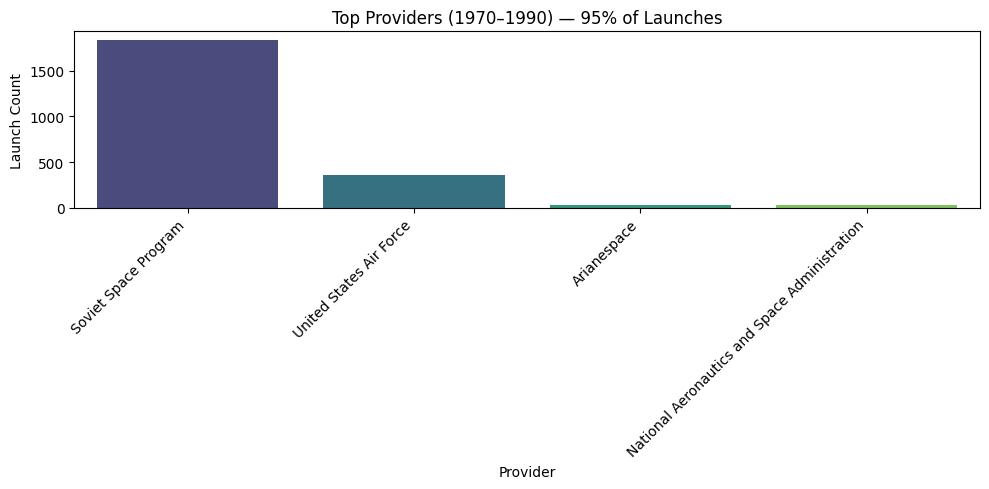

C:\Users\adrcleme\AppData\Local\Temp\ipykernel_23040\2282718032.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_providers, x='Provider', y='Launch Count', palette='viridis')


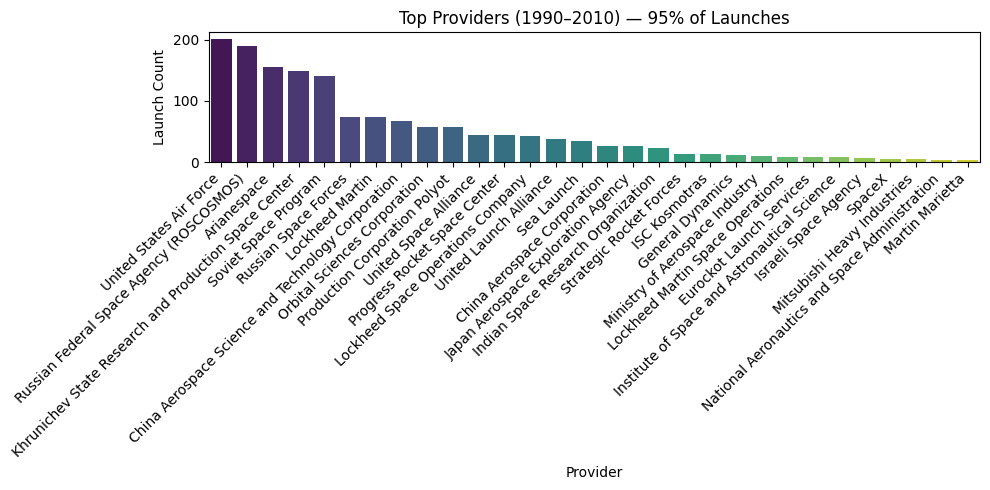


Top providers for Top Providers (2010–Present) — 95% of Launches:
                                             Provider  Launch Count
                                               SpaceX           501
   China Aerospace Science and Technology Corporation           411
                                          Arianespace           176
                               United Launch Alliance           167
             Russian Federal Space Agency (ROSCOSMOS)           142
                                           Rocket Lab            81
                   Indian Space Research Organization            74
                                      Virgin Galactic            67
                                 Russian Space Forces            66
                          Mitsubishi Heavy Industries            53
Khrunichev State Research and Production Space Center            46
                        International Launch Services            41
                                          Blue Or

C:\Users\adrcleme\AppData\Local\Temp\ipykernel_23040\2282718032.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_providers, x='Provider', y='Launch Count', palette='viridis')


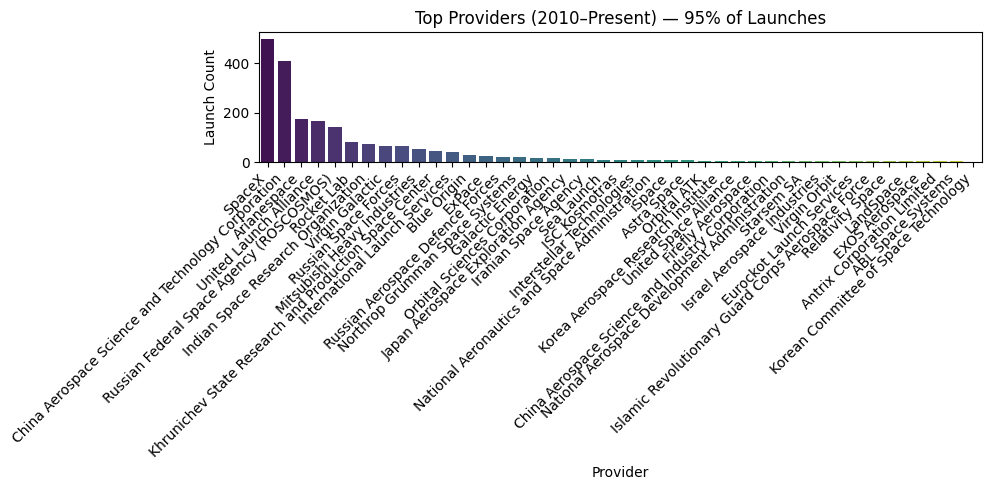

In [7]:
def plot_top_providers(df_period, title, percentage, print_on = True):
    plt.figure(figsize=(10, 5))

    provider_counts = df_period['Provider'].value_counts().reset_index()
    provider_counts.columns = ['Provider', 'Launch Count']

    provider_counts['Cumulative %'] = provider_counts['Launch Count'].cumsum() / provider_counts['Launch Count'].sum()
    top_providers = provider_counts[provider_counts['Cumulative %'] <= percentage]
    if print_on :
        print(f"\nTop providers for {title}:")
        print(top_providers[['Provider', 'Launch Count']].to_string(index=False))

    sns.barplot(data=top_providers, x='Provider', y='Launch Count', palette='viridis')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_top_providers(df_1957_1970, 'Top Providers (1957–1970) — 95% of Launches', 0.95, False)
plot_top_providers(df_1970_1990, 'Top Providers (1970–1990) — 95% of Launches', 0.95, False)
plot_top_providers(df_1990_2010, 'Top Providers (1990–2010) — 95% of Launches',0.99, False)
plot_top_providers(df_2010_present, 'Top Providers (2010–Present) — 95% of Launches',0.99, True)


### Mid Results

From the previous analysis, here are the top launch providers during each of the four periods:


🚀 **The Dawn of Space & the Space Race (1957–1975) :**
Soviet Space Program,
United States Air Force

🌐 **Stabilization & Early Cooperation (1975–1990) :**
Soviet Space Program,
United States Air Force,
Ariane Space,
Lockheed Space Operations Company

🌍 **International Collaboration & the ISS Era (1990–2010) :**
United States Air Force,
Russian Federal Space Agency,
Ariane Space,
Khrunichev State Research and Production Space Center,
Soviet Space Program,
Russian Space Forces,
Lockheed Martin,
China Aerospace Science and Technology Corporation,
Orbital Sciences Corporation,
Production Corporation Polyot,
United Space Alliance,
Progress Rocket Space Center,
Lockheed Space Operations Company,
United Launch Alliance,
Sea Launch,
China Aerospace Corporation,
Japan Aerospace Exploration Agency,
Indian Space Research Organization,
Strategic Rocket Forces,
ISC Kosmotras,

🌌 **Global Expansion & New Space (2010–Present) :** 
SpaceX,
China Aerospace Science and Technology Corporation,
Arianespace,
United Launch Alliance,
Russian Federal Space Agency (ROSCOSMOS),
Rocket Lab,
Indian Space Research Organization,
Virgin Galactic,
Russian Space Forces,
Mitsubishi Heavy Industries,
Khrunichev State Research and Production Center,
International Launch Services,
Blue Origin,
ExPace,
Russian Aerospace Defence Forces,
Northrop Grumman Space Systems,
Galactic Energy,
Orbital Sciences Corporation,
Japan Aerospace Exploration Agency,
Iranian Space Agency,
Sea Launch,
ISC Kosmotras,
Interstellar Technologies,
NASA,
iSpace

### 🇷🇺 Why are there multiple Russian providers?
Historical Transitions (USSR → Russia):

Before 1991, space operations were under the Soviet Space Program, which was a state-controlled umbrella organization.

After the USSR collapsed, Russia's space efforts fragmented into different organizations, each responsible for a part of the previous Soviet infrastructure.

Multiple Specialized Entities:
Post-1991, different agencies, research centers, and military branches were involved in launches. Some key ones:

Provider Name	Role
Russian Federal Space Agency (ROSCOSMOS)	Civilian agency coordinating space activities (like NASA).
Khrunichev State Research and Production Space Center	Manufacturer of Proton rockets and other hardware.
Russian Space Forces	Military branch in charge of military launches.
Progress Rocket Space Center	Manufacturer of Soyuz launch vehicles.
Strategic Rocket Forces	Originally military, handled ICBMs and some satellite launches.
ISC Kosmotras	Joint Russian-Ukrainian venture, used converted ICBMs for satellite launches.
Separation of Builder vs. Operator:
In the data, some providers are manufacturers, while others are launch operators or coordinators. Unlike NASA, which designs, builds, and launches, Russia has more segmentation:

e.g., Khrunichev builds rockets.

e.g., ROSCOSMOS manages missions and coordination.

e.g., Russian Space Forces launches military satellites.

C:\Users\adrcleme\AppData\Local\Temp\ipykernel_23040\2282718032.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_providers, x='Provider', y='Launch Count', palette='viridis')


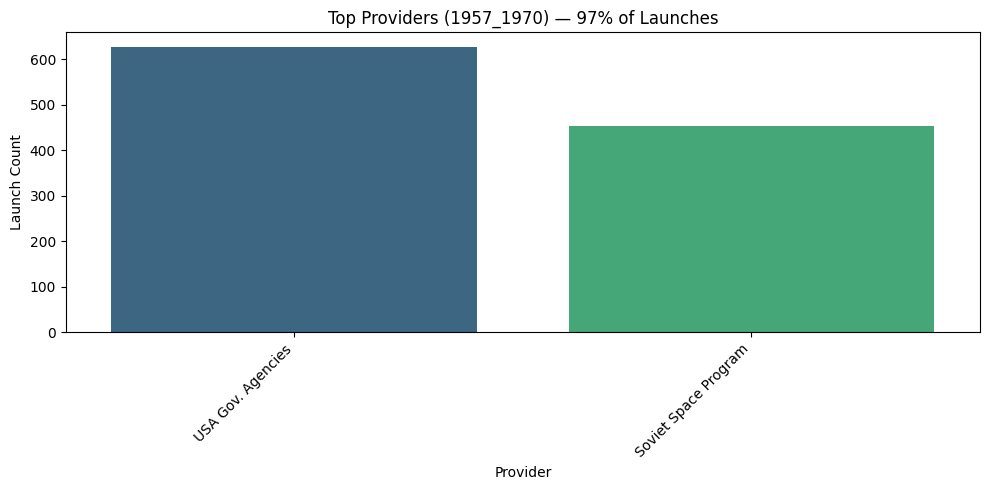

C:\Users\adrcleme\AppData\Local\Temp\ipykernel_23040\2282718032.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_providers, x='Provider', y='Launch Count', palette='viridis')


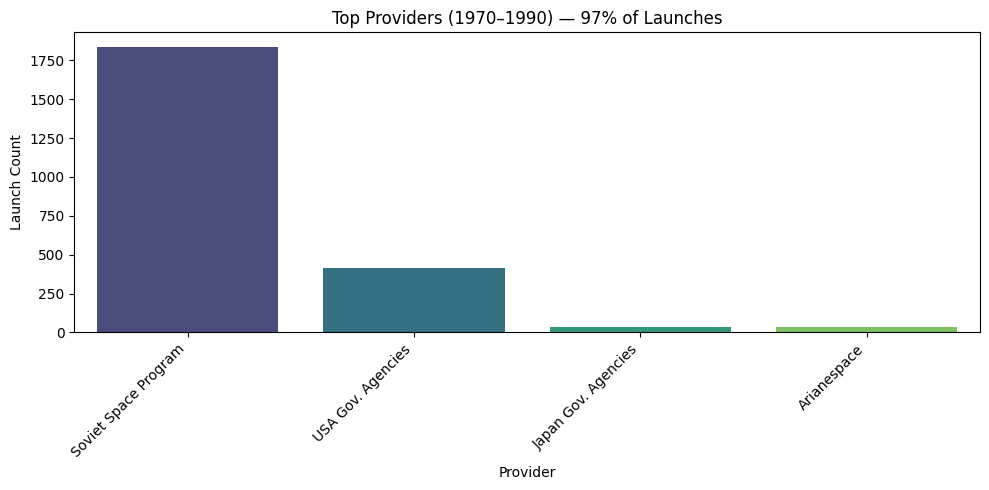

C:\Users\adrcleme\AppData\Local\Temp\ipykernel_23040\2282718032.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_providers, x='Provider', y='Launch Count', palette='viridis')


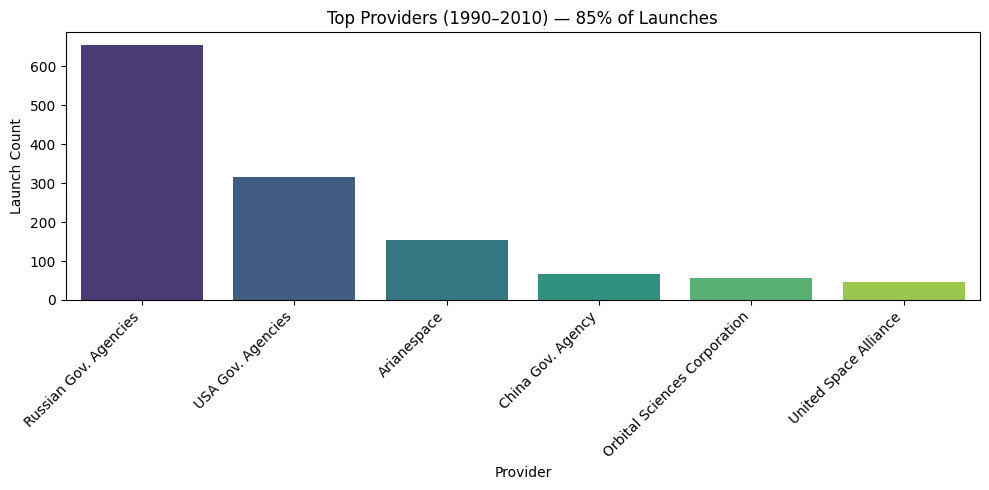

C:\Users\adrcleme\AppData\Local\Temp\ipykernel_23040\2282718032.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_providers, x='Provider', y='Launch Count', palette='viridis')


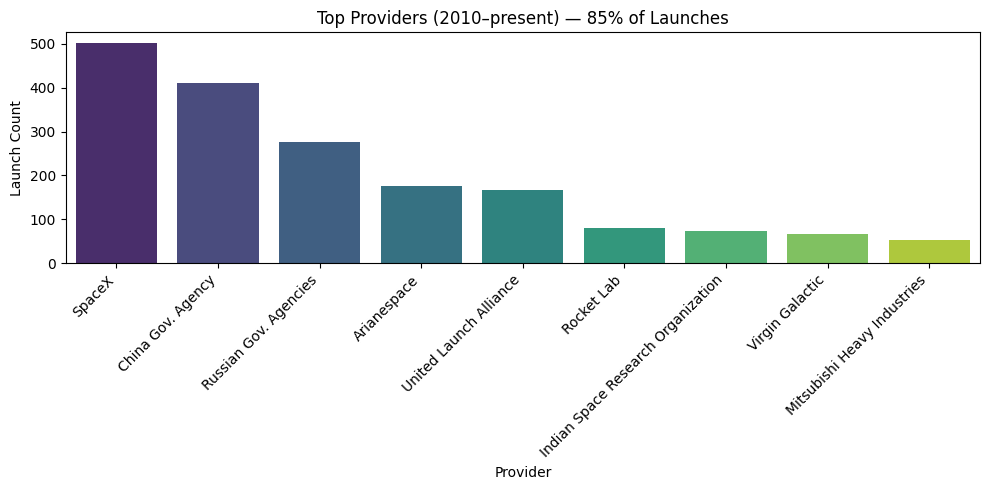

In [8]:
mapping_1957_1970 = {
    "United States Air Force": "USA Gov. Agencies",
    "US Navy": "USA Gov. Agencies",
    "National Aeronautics and Space Administration": "USA Gov. Agencies",
} # Is there a way to not show the others (put all of them exept the first 2 in others

mapping_1970_1990 = {
    "United States Air Force": "USA Gov. Agencies",
    "National Aeronautics and Space Administration": "USA Gov. Agencies",
    "Institute of Space and Astronautical Science": "Japan Gov. Agencies",
    "National Space Development Agency of Japan": "Japan Gov. Agencies",
    "Lockheed Space Operations Company": "USA Gov. Agencies",
}

mapping_1990_2010 = {
    "United States Air Force": "USA Gov. Agencies",
    "Khrunichev State Research and Production Space Center": "Russian Gov. Agencies",
    "Russian Federal Space Agency (ROSCOSMOS)": "Russian Gov. Agencies",
    "Soviet Space Program" : "Russian Gov. Agencies",
    "Russian Space Forces" : "Russian Gov. Agencies",
    "Lockheed Martin": "USA Gov. Agencies",
    "National Space Development Agency of Japan": "Japan Gov. Agencies",
    "Lockheed Space Operations Company": "USA Gov. Agencies",
    "Production Corporation Polyot" : "Russian Gov. Agencies",
    "Progress Rocket Space Center" : "Russian Gov. Agencies",
    "China Aerospace Science and Technology Corporation" : "China Gov. Agency",
}

mapping_2010_present = {
    "Khrunichev State Research and Production Space Center": "Russian Gov. Agencies",
    "Russian Space Forces" : "Russian Gov. Agencies",
    "Russian Aerospace Defence Forces": "Russian Gov. Agencies",
    "Russian Federal Space Agency (ROSCOSMOS)": "Russian Gov. Agencies",
    "China Aerospace Science and Technology Corporation" : "China Gov. Agency",

}

df_1957_1970.loc[:, 'Provider'] = df_1957_1970['Provider'].replace(mapping_1957_1970)
df_1970_1990.loc[:, 'Provider'] = df_1970_1990['Provider'].replace(mapping_1970_1990)
df_1990_2010.loc[:, 'Provider'] = df_1990_2010['Provider'].replace(mapping_1990_2010)
df_2010_present.loc[:, 'Provider'] = df_2010_present['Provider'].replace(mapping_2010_present)


plot_top_providers(df_1957_1970, 'Top Providers (1957_1970) — 97% of Launches', 0.97, False)
plot_top_providers(df_1970_1990, 'Top Providers (1970–1990) — 97% of Launches', 0.97, False)
plot_top_providers(df_1990_2010, 'Top Providers (1990–2010) — 85% of Launches', 0.85, False)
plot_top_providers(df_2010_present, 'Top Providers (2010–present) — 85% of Launches', 0.85, False)


C:\Users\adrcleme\AppData\Local\Temp\ipykernel_23040\2900509142.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_providers, x='Provider', y='Launch Count', palette='viridis', ax=ax)
C:\Users\adrcleme\AppData\Local\Temp\ipykernel_23040\2900509142.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\adrcleme\AppData\Local\Temp\ipykernel_23040\2900509142.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_providers, x='Provider', y='Launch Count', palette='viridis', ax=ax)
C:\Users\adrcleme\AppData\Local\Temp\ipyk

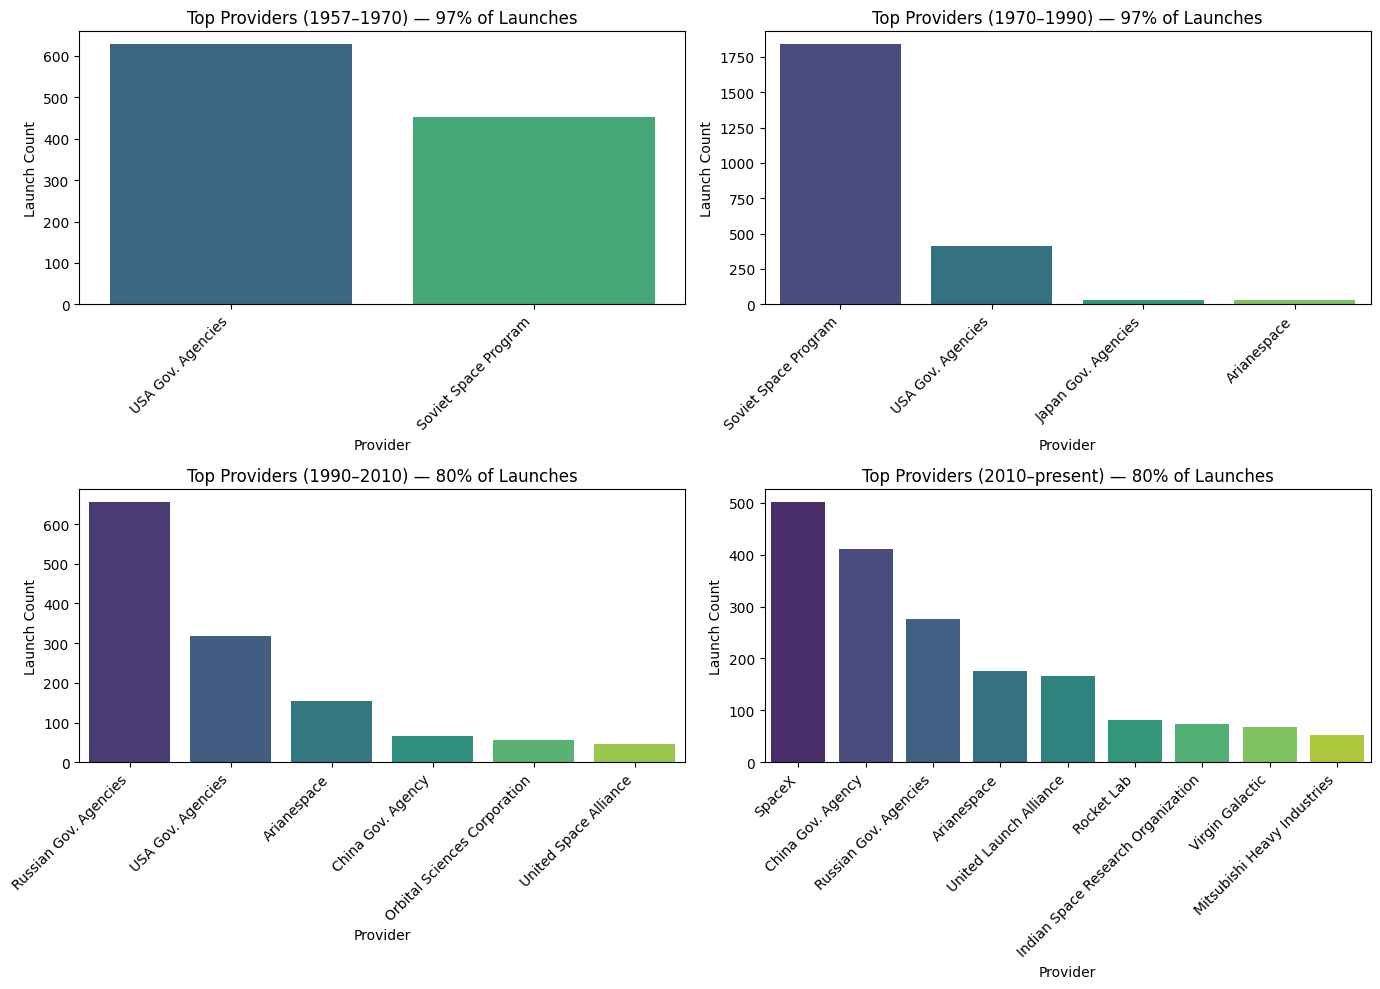

In [9]:
def plot_providers(df_period, title, percentage, ax=None, print_on=True):
    provider_counts = df_period['Provider'].value_counts().reset_index()
    provider_counts.columns = ['Provider', 'Launch Count']

    provider_counts['Cumulative %'] = provider_counts['Launch Count'].cumsum() / provider_counts['Launch Count'].sum()
    top_providers = provider_counts[provider_counts['Cumulative %'] <= percentage]
    
    if print_on:
        print(f"\nTop providers for {title}:")
        print(top_providers[['Provider', 'Launch Count']].to_string(index=False))

    sns.barplot(data=top_providers, x='Provider', y='Launch Count', palette='viridis', ax=ax)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

plot_providers(df_1957_1970, 'Top Providers (1957–1970) — 97% of Launches', 0.97, axs[0, 0], False)
plot_providers(df_1970_1990, 'Top Providers (1970–1990) — 97% of Launches', 0.97, axs[0, 1], False)
plot_providers(df_1990_2010, 'Top Providers (1990–2010) — 80% of Launches', 0.85, axs[1, 0], False)
plot_providers(df_2010_present, 'Top Providers (2010–present) — 80% of Launches', 0.85, axs[1, 1], False)

plt.tight_layout()
plt.show()


In [34]:
df_1970_1990.head()

,Name,Date (Central Time),Status,Provider,Rocket,Mission,Launch Pad,Country
1117,Voskhod | Zenit-2M 7,1970-01-09 03:20:00,Launch Successful,Soviet Space Program,Voskhod,Zenit-2M 7,"31/6 | Baikonur Cosmodrome, Republic of Kazakh...",Republic of Kazakhstan
1118,Titan 23B | KH-8 25,1970-01-14 12:43:00,Launch Successful,USA Gov. Agencies,Titan 23B,KH-8 25,"Space Launch Complex 4W | Vandenberg SFB, CA, USA",USA
1119,Thor Delta M | INTELSAT III F-6,1970-01-14 18:16:00,Launch Successful,USA Gov. Agencies,Thor Delta M,INTELSAT III F-6,"Space Launch Complex 17A | Cape Canaveral, FL,...",USA
1120,Kosmos 11K63 | DS-P1-Yu 29,1970-01-15 07:39:00,Launch Successful,Soviet Space Program,Kosmos 11K63,DS-P1-Yu 29,"133/3 (133L) | Plesetsk Cosmodrome, Russian Fe...",Russian Federation
1121,Kosmos 11K63 | DS-MO 2,1970-01-16 04:59:00,Launch Successful,Soviet Space Program,Kosmos 11K63,DS-MO 2,"86/4 | Kapustin Yar, Russian Federation",Russian Federation


In [32]:
rocket_counts = df_1970_1990.groupby(['Provider', 'Rocket']).size().reset_index(name='LaunchCount')

max_counts = rocket_counts.groupby('Provider')['LaunchCount'].transform('max')
most_launched_rockets = rocket_counts[rocket_counts['LaunchCount'] == max_counts]

In [33]:
rocket_counts[rocket_counts["Provider"] == "USA Gov. Agencies"].sort_values("LaunchCount", ascending=False).head()

,Provider,Rocket,LaunchCount
95,USA Gov. Agencies,Delta 2914,30
82,USA Gov. Agencies,Atlas SLV-3D Centaur,30
116,USA Gov. Agencies,Space Shuttle,24
129,USA Gov. Agencies,Titan 24B,23
137,USA Gov. Agencies,Titan IIIC,23


In [39]:
def top_rockets_of_top_providers(df, title, top_provider_pct=0.9, top_n_rockets=3):
    # Step 1: Get launch counts per provider
    provider_counts = df['Provider'].value_counts().reset_index()
    provider_counts.columns = ['Provider', 'Launch Count']
    provider_counts['Cumulative %'] = provider_counts['Launch Count'].cumsum() / provider_counts['Launch Count'].sum()

    # Step 2: Keep only providers in the top X% cumulative
    top_providers = provider_counts[provider_counts['Cumulative %'] <= top_provider_pct]['Provider']

    # Step 3: Filter original df to only those top providers
    df_top = df[df['Provider'].isin(top_providers)]

    # Step 4: Count launches per (Provider, Rocket)
    rocket_counts = df_top.groupby(['Provider', 'Rocket']).size().reset_index(name='Launch Count')

    # Step 5: Get the first launch date for each rocket
    # Assuming there is a 'Launch Date' column that is in datetime format
    df_top['Date (Central Time)'] = pd.to_datetime(df_top['Date (Central Time)'])
    first_launch_dates = df_top.groupby(['Provider', 'Rocket'])['Date (Central Time)'].min().reset_index(name='firstLaunch')

    # Step 6: Calculate the success rate for each rocket
    # Treat 'Launch Failure' and 'Launch was a Partial Failure' as failures
    success_counts = df_top.groupby(['Provider', 'Rocket'])['Status'].apply(
        lambda x: (x == 'Launch Successful').sum()).reset_index(name='Successful Launches')
    total_counts = df_top.groupby(['Provider', 'Rocket'])['Status'].count().reset_index(name='Total Launches')
    
    # Merge success and total launch counts to get success rate
    rocket_success = pd.merge(success_counts, total_counts, on=['Provider', 'Rocket'])
    rocket_success['Success Rate'] = rocket_success['Successful Launches'] / rocket_success['Total Launches']

    # Step 7: Merge everything (launch count, first launch date, success rate) together
    rocket_counts = pd.merge(rocket_counts, first_launch_dates, on=['Provider', 'Rocket'])
    rocket_counts = pd.merge(rocket_counts, rocket_success[['Provider', 'Rocket', 'Success Rate']], on=['Provider', 'Rocket'])

    # Step 8: Sort and take top N rockets per provider
    rocket_counts = rocket_counts.sort_values(['Provider', 'Launch Count'], ascending=[True, False])
    top_rockets = rocket_counts.groupby('Provider').head(top_n_rockets).reset_index(drop=True)

    print("\n")
    print(title)
    print(top_rockets)
    
    return top_rockets


# Example of usage for different timeframes
rockets_1957_1970 = top_rockets_of_top_providers(df_1957_1970, "Top Rockets from Top Providers (1957–1970):", 0.97, 3)
rockets_1970_1990 = top_rockets_of_top_providers(df_1970_1990, "Top Rockets from Top Providers (1970–1990):", 0.97, 3)
rockets_1990_2010 = top_rockets_of_top_providers(df_1990_2010, "Top Rockets from Top Providers (1990–2010):", 0.85, 3)
rockets_2010_present = top_rockets_of_top_providers(df_2010_present, "Top Rockets from Top Providers (2010–present):", 0.85, 3)




Top Rockets from Top Providers (1957–1970):
               Provider               Rocket  Launch Count  \
0  Soviet Space Program              Voskhod           113   
1  Soviet Space Program         Kosmos 11K63            51   
2  Soviet Space Program          Vostok 8A92            44   
3     USA Gov. Agencies  Thor SLV-2A Agena D            61   
4     USA Gov. Agencies  Atlas SLV-3 Agena D            48   
5     USA Gov. Agencies   Thor DM-21 Agena-B            40   

          firstLaunch  Success Rate  
0 1963-11-16 04:34:00      0.964602  
1 1965-10-19 00:44:00      0.960784  
2 1962-06-01 04:38:00      0.909091  
3 1963-02-28 15:48:00      0.934426  
4 1964-08-14 17:00:00      0.916667  
5 1960-10-26 10:26:00      0.800000  


Top Rockets from Top Providers (1970–1990):
                Provider                Rocket  Launch Count  \
0            Arianespace              Ariane 3            11   
1            Arianespace              Ariane 1            10   
2            Ar

C:\Users\adrcleme\AppData\Local\Temp\ipykernel_23040\1602777732.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Date (Central Time)'] = pd.to_datetime(df_top['Date (Central Time)'])
C:\Users\adrcleme\AppData\Local\Temp\ipykernel_23040\1602777732.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Date (Central Time)'] = pd.to_datetime(df_top['Date (Central Time)'])
C:\Users\adrcleme\AppData\Local\Temp\ipykernel_23040\1602777732.py:18: SettingWithCopyWarning: 
A value is trying to be se